In [1]:
import pandas as pd
import numpy as np

### Data Modification For PCA

In [5]:
sell_data = pd.read_csv("transactions_train.csv")
product_details = pd.read_csv("articles.csv") 

In [16]:
product_details.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [28]:
product_details.shape

(105542, 25)

In [11]:
article_sales = sell_data.groupby(['article_id'])['article_id'].count()
display(article_sales)

article_id
108775015    10671
108775044     6684
108775051      215
110065001      817
110065002      456
             ...  
819519001       16
819519002        6
822653001        3
823171001       37
823174002       37
Name: article_id, Length: 63369, dtype: int64

In [20]:
sale_data = pd.DataFrame({"article_id" : article_sales.index.tolist(),
                   "sale_data" : article_sales.tolist()})

In [15]:
article_unique_customer = sell_data.groupby(['article_id'])['customer_id'].nunique()
display(article_unique_customer)

article_id
108775015    6763
108775044    4895
108775051     168
110065001     731
110065002     379
             ... 
819519001      14
819519002       6
822653001       3
823171001      34
823174002      36
Name: customer_id, Length: 63369, dtype: int64

In [21]:
unique_customer = pd.DataFrame({"article_id" : article_unique_customer.index.tolist(),
                   "uniq_customer" : article_unique_customer.tolist()})

In [24]:
mod_product_details = pd.merge( product_details, sale_data, how="left", on=["article_id", "article_id"])

mod_product_details = pd.merge( mod_product_details, unique_customer, how="left", on=["article_id", "article_id"])


In [31]:
mod_product_details["sale_data"].fillna(0, inplace = True)
mod_product_details["uniq_customer"].fillna(0, inplace = True)

mod_product_details.to_csv('mod_articles.csv')

In [33]:
mod_product_details.head(1)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,sale_data,uniq_customer
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,10671.0,6763.0


In [34]:
mod_product_details.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc', 'sale_data',
       'uniq_customer'],
      dtype='object')

In [106]:
df = mod_product_details[['article_id','product_type_name','product_group_name', 'graphical_appearance_name', 'colour_group_name','perceived_colour_value_name', 'perceived_colour_master_name', 'department_name', 'index_group_name','section_name' ,'garment_group_name', 'uniq_customer', 'sale_data' ]]

In [54]:
dummy = ["product_type_name", "product_group_name", "graphical_appearance_name", "colour_group_name" ,"perceived_colour_value_name","perceived_colour_master_name","department_name","index_group_name","section_name","garment_group_name"]

In [55]:
# One hot encoding - to convert categorical data to continuous

df[dummy] = df[dummy ].astype(str)
df3 = pd.get_dummies(df[dummy])
df3.head(5)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,product_type_name_Accessories set,product_type_name_Alice band,product_type_name_Baby Bib,product_type_name_Backpack,product_type_name_Bag,product_type_name_Ballerinas,product_type_name_Beanie,product_type_name_Belt,product_type_name_Bikini top,product_type_name_Blanket,...,garment_group_name_Shorts,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown,garment_group_name_Woven/Jersey/Knitted mix Baby
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## PCA Implementaion

In [36]:
df.head()

,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,uniq_customer,sale_data
0,Strap top,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,6763.0,10671.0
1,Strap top,Vest top,Garment Upper body,Solid,White,Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,4895.0,6684.0
2,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Dusty Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,168.0,215.0
3,OP T-shirt (Idro),Bra,Underwear,Solid,Black,Dark,Black,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear",731.0,817.0
4,OP T-shirt (Idro),Bra,Underwear,Solid,White,Light,White,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear",379.0,456.0


In [37]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [60]:
X = df3

In [59]:
#In general a good idea is to scale the data
y  = np.array(df['sale_data'].tolist()).reshape(-1,1)
scaler = StandardScaler()
scaler.fit(y)
y =scaler.transform(y)    

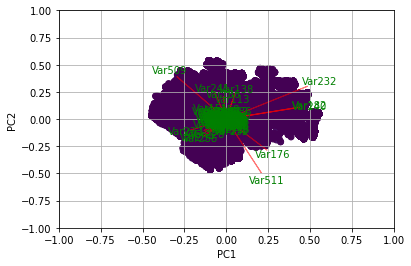

In [61]:
pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [67]:
pca_score = pca.explained_variance_ratio_.tolist()

In [68]:
pca_variable_name = df3.columns.tolist()

In [70]:
pca_variable_name

['product_type_name_Accessories set',
 'product_type_name_Alice band',
 'product_type_name_Baby Bib',
 'product_type_name_Backpack',
 'product_type_name_Bag',
 'product_type_name_Ballerinas',
 'product_type_name_Beanie',
 'product_type_name_Belt',
 'product_type_name_Bikini top',
 'product_type_name_Blanket',
 'product_type_name_Blazer',
 'product_type_name_Blouse',
 'product_type_name_Bodysuit',
 'product_type_name_Bootie',
 'product_type_name_Boots',
 'product_type_name_Bra',
 'product_type_name_Bra extender',
 'product_type_name_Bracelet',
 'product_type_name_Braces',
 'product_type_name_Bucket hat',
 'product_type_name_Bumbag',
 'product_type_name_Cap',
 'product_type_name_Cap/peaked',
 'product_type_name_Cardigan',
 'product_type_name_Chem. cosmetics',
 'product_type_name_Clothing mist',
 'product_type_name_Coat',
 'product_type_name_Costumes',
 'product_type_name_Cross-body bag',
 'product_type_name_Cushion',
 'product_type_name_Dog Wear',
 'product_type_name_Dog wear',
 'product

In [74]:

pip install python-Levenshtein

  Using cached python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl
Note: you may need to restart the kernel to use updated packages.


In [73]:
pip install fuzzywuzzy

  Using cached fuzzywuzzy-0.18.0-py2.py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [75]:

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [76]:
orignal_columns = df.columns.tolist()

In [77]:

match_column = []
for c in pca_variable_name:
    match_column.append(process.extractOne(c, orignal_columns)[0])

In [79]:
pca_score = pd.DataFrame({ 'pca_variable_name' : pca_variable_name,
                         'pca_actual_variable': match_column,
                         'pca_value' : pca_score})


In [84]:
pca_score['pca_value'] = pca_score['pca_value'].astype('float') 

In [85]:
pca_score

,pca_variable_name,pca_actual_variable,pca_value
0,product_type_name_Accessories set,product_type_name,7.158669e-02
1,product_type_name_Alice band,product_type_name,5.311949e-02
2,product_type_name_Baby Bib,product_type_name,4.940208e-02
3,product_type_name_Backpack,product_type_name,3.634538e-02
4,product_type_name_Bag,product_type_name,3.550350e-02
...,...,...,...
585,garment_group_name_Trousers,garment_group_name,1.848824e-34
586,garment_group_name_Trousers Denim,garment_group_name,1.087509e-34
587,"garment_group_name_Under-, Nightwear",garment_group_name,4.547463e-35
588,garment_group_name_Unknown,garment_group_name,1.647085e-35


In [114]:
pca_final_score = pca_score.groupby(['pca_actual_variable'])['pca_value'].sum()
display(pca_final_score)

pca_actual_variable
colour_group_name               2.395032e-02
department_name                 2.184255e-02
garment_group_name              4.720814e-33
graphical_appearance_name       2.230120e-02
index_group_name                1.007291e-32
perceived_colour_master_name    6.457032e-03
perceived_colour_value_name     2.967951e-03
product_group_name              1.898876e-02
product_type_name               9.034922e-01
section_name                    2.062052e-32
Name: pca_value, dtype: float64

In [89]:
column_weigh = pd.DataFrame({'columns': pca_final_score.index.tolist(),
                               'sale_to_weight': pca_final_score.tolist()})

In [91]:
column_weigh.to_csv('column_weigh.csv')

In [93]:
df.head(2)

,article_id,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_group_name,section_name,garment_group_name,uniq_customer,sale_data
0,108775015,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Womens Everyday Basics,Jersey Basic,6763.0,10671.0
1,108775044,Vest top,Garment Upper body,Solid,White,Light,White,Jersey Basic,Ladieswear,Womens Everyday Basics,Jersey Basic,4895.0,6684.0


In [97]:
df_column = df.columns.tolist()
df_column = df_column[1:-2] 

In [100]:
df['product_type_name'].value_counts().index.tolist()[:5]
df.loc[df["product_type_name"].isin(df['product_type_name'].value_counts().index.tolist()[:5]) == False, "product_type_name"] = 'other'

['Trousers', 'Dress', 'Sweater', 'T-shirt', 'Top']

In [101]:
df.loc[df["product_type_name"].isin(df['product_type_name'].value_counts().index.tolist()[:5]) == False, "product_type_name"] = 'other'

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [102]:
df

,article_id,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_group_name,section_name,garment_group_name,uniq_customer,sale_data
0,108775015,other,Garment Upper body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Womens Everyday Basics,Jersey Basic,6763.0,10671.0
1,108775044,other,Garment Upper body,Solid,White,Light,White,Jersey Basic,Ladieswear,Womens Everyday Basics,Jersey Basic,4895.0,6684.0
2,108775051,other,Garment Upper body,Stripe,Off White,Dusty Light,White,Jersey Basic,Ladieswear,Womens Everyday Basics,Jersey Basic,168.0,215.0
3,110065001,other,Underwear,Solid,Black,Dark,Black,Clean Lingerie,Ladieswear,Womens Lingerie,"Under-, Nightwear",731.0,817.0
4,110065002,other,Underwear,Solid,White,Light,White,Clean Lingerie,Ladieswear,Womens Lingerie,"Under-, Nightwear",379.0,456.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,other,Socks & Tights,Placement print,Black,Dark,Black,Socks Bin,Menswear,Men Underwear,Socks and Tights,0.0,0.0
105538,953763001,other,Garment Upper body,Solid,Black,Dark,Black,Jersey,Ladieswear,H&M+,Jersey Fancy,0.0,0.0
105539,956217002,Dress,Garment Full body,Solid,Black,Dark,Black,Jersey,Ladieswear,Womens Trend,Jersey Fancy,0.0,0.0
105540,957375001,other,Accessories,Solid,Black,Dark,Black,Small Accessories,Divided,Divided Accessories,Accessories,0.0,0.0


In [105]:
df['product_type_name'].value_counts().index.tolist()[:9]


['other', 'Trousers', 'Dress', 'Sweater', 'T-shirt', 'Top']

In [107]:
for i in df_column:
    df.loc[df[i].isin(df[i].value_counts().index.tolist()[:5]) == False,i] = 'other'
    

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [109]:
df

,article_id,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_group_name,section_name,garment_group_name,uniq_customer,sale_data
0,108775015,other,Garment Upper body,Solid,Black,Dark,Black,other,Ladieswear,other,Jersey Basic,6763.0,10671.0
1,108775044,other,Garment Upper body,Solid,White,Light,White,other,Ladieswear,other,Jersey Basic,4895.0,6684.0
2,108775051,other,Garment Upper body,Stripe,other,Dusty Light,White,other,Ladieswear,other,Jersey Basic,168.0,215.0
3,110065001,other,Underwear,Solid,Black,Dark,Black,other,Ladieswear,other,"Under-, Nightwear",731.0,817.0
4,110065002,other,Underwear,Solid,White,Light,White,other,Ladieswear,other,"Under-, Nightwear",379.0,456.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,other,other,other,Black,Dark,Black,other,Menswear,other,other,0.0,0.0
105538,953763001,other,Garment Upper body,Solid,Black,Dark,Black,Jersey,Ladieswear,other,Jersey Fancy,0.0,0.0
105539,956217002,Dress,Garment Full body,Solid,Black,Dark,Black,Jersey,Ladieswear,other,Jersey Fancy,0.0,0.0
105540,957375001,other,Accessories,Solid,Black,Dark,Black,other,Divided,other,Accessories,0.0,0.0


In [110]:
df[dummy] = df[dummy ].astype(str)
df3 = pd.get_dummies(df[dummy])
df3.head(5)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,product_type_name_Dress,product_type_name_Sweater,product_type_name_T-shirt,product_type_name_Top,product_type_name_Trousers,product_type_name_other,product_group_name_Accessories,product_group_name_Garment Full body,product_group_name_Garment Lower body,product_group_name_Garment Upper body,...,section_name_Kids Girl,section_name_Womens Everyday Collection,section_name_Young Girl,section_name_other,garment_group_name_Accessories,garment_group_name_Jersey Basic,garment_group_name_Jersey Fancy,garment_group_name_Knitwear,"garment_group_name_Under-, Nightwear",garment_group_name_other
0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [118]:
X = df3

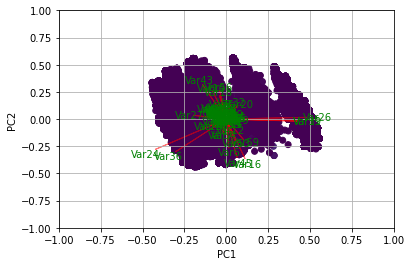

In [119]:
pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [120]:
pca_score2 = pca.explained_variance_ratio_.tolist()

In [131]:
len(match_column2)

59

In [129]:
pca_variable_name2 = df3.columns.tolist()
match_column2 = []
for c in pca_variable_name2:
    match_column2.append(process.extractOne(c, orignal_columns)[0])

In [130]:
pca_score2 = pd.DataFrame({ 'pca_variable_name' : pca_variable_name2,
                         'pca_actual_variable': match_column2,
                         'pca_value' : pca_score2})


In [132]:
pca_final_score2 = pca_score2.groupby(['pca_actual_variable'])['pca_value'].sum()
display(pca_final_score2)

pca_actual_variable
colour_group_name               8.119646e-02
department_name                 1.949671e-02
garment_group_name              5.961767e-32
graphical_appearance_name       1.319941e-01
index_group_name                1.014848e-02
perceived_colour_master_name    3.468218e-02
perceived_colour_value_name     5.173739e-02
product_group_name              2.287959e-01
product_type_name               4.402421e-01
section_name                    1.706685e-03
Name: pca_value, dtype: float64

In [134]:
column_weigh2 = pd.DataFrame({'columns': pca_final_score2.index.tolist(),
                               'sale_to_weight': pca_final_score2.tolist()})

In [141]:
column_weigh2.sort_values(by=['sale_to_weight'],ascending=False)

,columns,sale_to_weight
8,product_type_name,4.402421e-01
7,product_group_name,2.287959e-01
3,graphical_appearance_name,1.319941e-01
0,colour_group_name,8.119646e-02
6,perceived_colour_value_name,5.173739e-02
5,perceived_colour_master_name,3.468218e-02
1,department_name,1.949671e-02
4,index_group_name,1.014848e-02
9,section_name,1.706685e-03
2,garment_group_name,5.961767e-32


In [139]:
column_weigh.sort_values(by=['sale_to_weight'],ascending=False)

,columns,sale_to_weight
8,product_type_name,9.034922e-01
0,colour_group_name,2.395032e-02
3,graphical_appearance_name,2.230120e-02
1,department_name,2.184255e-02
7,product_group_name,1.898876e-02
5,perceived_colour_master_name,6.457032e-03
6,perceived_colour_value_name,2.967951e-03
9,section_name,2.062052e-32
4,index_group_name,1.007291e-32
2,garment_group_name,4.720814e-33


In [ ]:
column_weigh2 = pd.DataFrame({'columns': pca_final_score2.index.tolist(),
                               'sale_to_weight': pca_final_score2.tolist()})

In [144]:
pca_score.to_csv('column_category_weight_1.csv')